In [1]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow, show
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [13, 10]

## Read in data

In [2]:
csv_file = "../data/ASM/test.csv"
batch_size=16

# read in predictions
data = pickle.load(open("./tf_output/prediction/preds.pkl", "rb"))
# read in csv
imfiles = pd.read_csv(csv_file, sep="\t")
# imfiles.new_img_path = [l.replace("Images_mod", "Images/Lines") for l in imfiles.new_img_path]

In [3]:
def getImg(ind):
    return Image.open(imfiles.new_img_path.iloc[ind])

def getLab1(ind):
    return imfiles.transcription.iloc[ind]
    
def getLab2(batch, b_ind):
    l1 = data.iloc[batch]["labels"]
    if len(l1) > 0:
        return l1[b_ind]
    else:
        return ""

def getPred(batch, b_ind):
    p1 = data.iloc[batch]["words"]
    if len(p1) > 0:
        return p1[b_ind]
    else:
        return ""

def getIt(batch, b_ind):
    ind = batch*batch_size+b_ind
#     batch = ind // train_batch_size
#     b_ind = ind % train_batch_size
    
    img = getImg(ind)
    tran = getLab1(ind)
    lab = getLab2(batch, b_ind)
    pred = getPred(batch, b_ind)
    
    if lab == "" and pred == "" and tran != "":
        print("No prediction from machine")
        return "", "", ""
    else:
        return img, lab, pred
    
def showIt(batch, b_ind):
    img, lab, pred = getIt(batch, b_ind)
    print("Label:\t\t{0}\nPrediction:\t{1}".format(str(lab, "utf-8"), str(pred, "utf-8")))
    imshow(np.asarray(img), cmap="gray")
    show()

# Examples of transcriptions

In [4]:
i = 10
for j in range(16):
    print("Label:\t{0}\nPred:\t{1}\n".format(data.iloc[i]["labels"][j], data.iloc[i]["words"][j]))

Label:	b'  '
Pred:	b'his herse yet _ Mame hen "" Bavrecc "" when he dves"'

Label:	b'  '
Pred:	b'fet him - BQuiners of ah sets ivery , dak-so Anasy'

Label:	b'  '
Pred:	b"' Inen have fne to the Wbun thatthe Cits teems Wke"

Label:	b'  '
Pred:	b'a tof Women -Womeins Rightswrli now prevme .'

Label:	b'  '
Pred:	b' Jeft bavis Couchman was herelast wrek  I as  '

Label:	b'  '
Pred:	b'introduecet to him-hefave asheeet , but Ddut nothees'

Label:	b'  '
Pred:	b'Ihare writte tes Amici te noiet cenfunei at the Initlio'

Label:	b'  '
Pred:	b'do gru ert excuse ale mirtakes -tanny denets he '

Label:	b'  '
Pred:	b'bert leve to ale- Lodo 3-Soo bye- . Traff frsuncl '

Label:	b'  '
Pred:	b' tutsbeborwh thertom . JethSucketseu'

Label:	b'  '
Pred:	b'.D2h+0o '

Label:	b'  '
Pred:	b'"eer strr ur icmumse y <2pr"'

Label:	b'  '
Pred:	b'" 6 " " ""effista Gony 13 183t  bns"'

Label:	b'  '
Pred:	b' Dur Sn t recione yor kine favonn \' goo sfe ana s hiea"'

Label:	b'  '
Pred:	b'"Lave anovernd befou ""this tee 

Label:		  
Prediction:	his herse yet _ Mame hen "" Bavrecc "" when he dves"


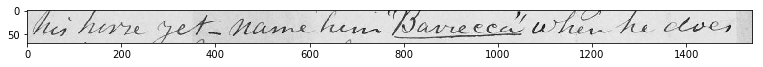

Label:		  
Prediction:	fet him - BQuiners of ah sets ivery , dak-so Anasy


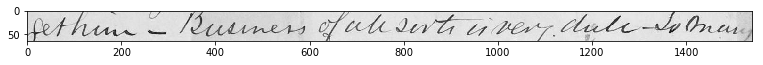

Label:		  
Prediction:	' Inen have fne to the Wbun thatthe Cits teems Wke


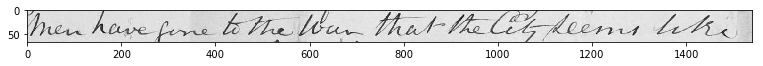

Label:		  
Prediction:	a tof Women -Womeins Rightswrli now prevme .


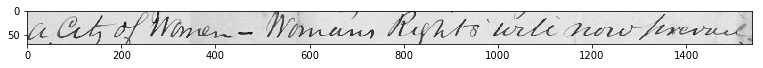

Label:		  
Prediction:	 Jeft bavis Couchman was herelast wrek  I as  


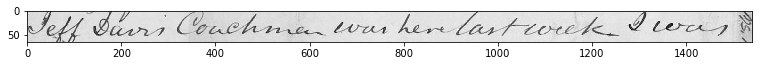

Label:		  
Prediction:	introduecet to him-hefave asheeet , but Ddut nothees


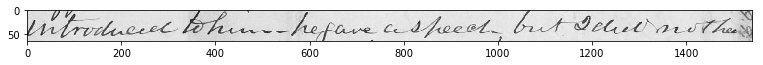

Label:		  
Prediction:	Ihare writte tes Amici te noiet cenfunei at the Initlio


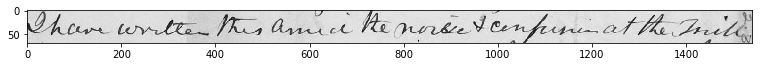

Label:		  
Prediction:	do gru ert excuse ale mirtakes -tanny denets he 


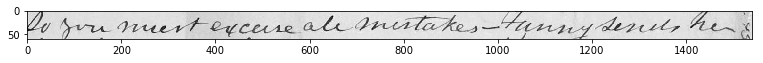

Label:		  
Prediction:	bert leve to ale- Lodo 3-Soo bye- . Traff frsuncl 


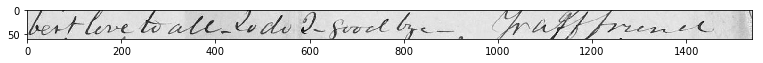

Label:		  
Prediction:	 tutsbeborwh thertom . JethSucketseu


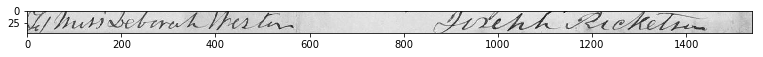

Label:		  
Prediction:	.D2h+0o 


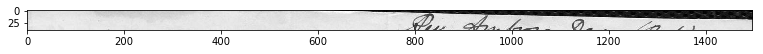

Label:		  
Prediction:	"eer strr ur icmumse y <2pr"


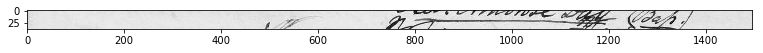

Label:		  
Prediction:	" 6 " " ""effista Gony 13 183t  bns"


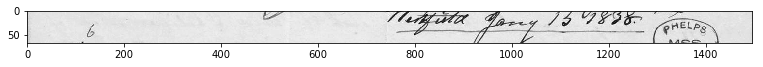

Label:		  
Prediction:	 Dur Sn t recione yor kine favonn ' goo sfe ana s hiea"


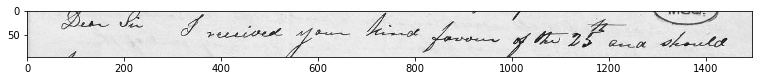

Label:		  
Prediction:	"Lave anovernd befou ""this tee hur for tios rcesm . I Ilawe bun"


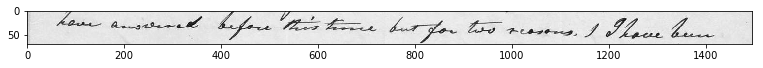

Label:		  
Prediction:	 mruolly ouutiee .2 I la not the informotion yoe ast .


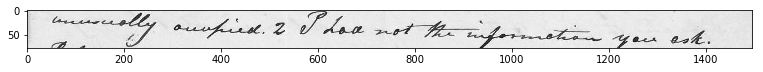

In [5]:
for i in range(16):
    showIt(10, i)

In [ ]:
showIt(0, 14)

# Successes

# Slightly off

# Failures